Ben and I moved to New Hampshire in August. We moved into a small cottage on his parents' new house property, and figured that because we weren't going to be paying rent we could splurge on house expenses. But we went kinda wild, so let's see if the gamble was right...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('Claire and Ben moving costs - Sheet1.csv')

df.columns = ['_'.join(c.lower().split()) for c in df.columns]

df.head()

,who_paid,how_much,for_what,from_where,category
0,CD,$815.28,Fridge,home depot,appliances
1,CD,$185.96,Microwave and outdoor shower,home depot,appliances
2,BP,$159.50,Utilities,casa russell,utilities
3,CD,$312.77,Moving truck & other moving costs,home depot (Waltham),moving
4,CD,$296.01,Moving truck (first weekend),home depot (Chelsea),moving


First question, and the goal of this whole thing: are we settled up, or did one of us pay way more than the other?

In [7]:
df['how_much'] = (
    df['how_much'].str.strip('$').str.replace(',', '').astype(float)
)
df.groupby('who_paid').sum()

,how_much
who_paid,
BP,4185.75
CD,7399.51


Wow, at the beginning we thought that Ben would have paid way more because he got all the Amazon stuff. But it looks like I've now outpaced him -- probably due to the couple of large expenses I paid for (couch, our part of the hut tub). 

Let's break it down by category and see how things stack up.

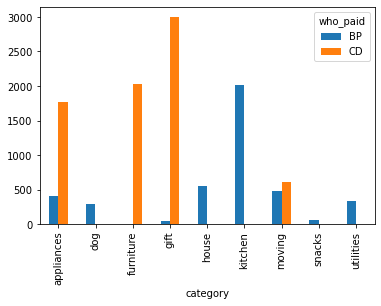

In [17]:
(df.groupby(['category', 'who_paid']).sum()
   .reset_index() # get category, who paid, and total amount in columns
   .pivot(index='category', columns='who_paid', values='how_much') # reshape to get categories per row, person per columns; for plotting with pandas
   .plot(kind='bar') #, x='category', y='how_much', color='who_paid')
)

Sure enough, I paid the \\$3000 for the hot tub/Ben's mom's bike and ~\\$2000 for the couch. If we remove these, how do we stack up?

## Moving expenses only

          how_much
who_paid          
BP         3441.59
CD         2375.01


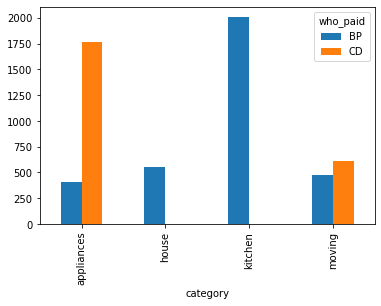

In [19]:
# Keep just appliances, house, kitchen, and moving expenses
keep_cats = ['appliances', 'house', 'kitchen', 'moving']

print(df.query('category == @keep_cats').groupby('who_paid').sum())

(df.query('category == @keep_cats')
   .groupby(['category', 'who_paid']).sum()
   .reset_index() # get category, who paid, and total amount in columns
   .pivot(index='category', columns='who_paid', values='how_much') # reshape to get categories per row, person per columns; for plotting with pandas
   .plot(kind='bar') #, x='category', y='how_much', color='who_paid')
)

Ok, so if we just look at the things that would be more directly considered as moving expenses, then Ben spent about \\$1000 more than I did.

It's interesting that we did end up just about equaling out on moving expenses. We tried to go back and forth for the two weekends that we spent moving, but we weren't sure if it had evened out. Also wow moving is expensive -- a little over a thousand dollars to buy all the boxes and moving supplies, and to rent a truck for two weekends. I wonder how much hiring a moving crew would have cost, especially considering that spending two full weekends moving was _quite_ miserable and would be worth a lot of money to not have to repeat. But good to know how much it all added up to for next time we move, when we've both agreed to hire someone to help!

Out of curiosity, how much of these expenses were the truck vs. other things?

In [34]:
df.query('category == "moving"')

,who_paid,how_much,for_what,from_where,category
3,CD,312.77,Moving truck & other moving costs,home depot (Waltham),moving
4,CD,296.01,Moving truck (first weekend),home depot (Chelsea),moving
37,BP,46.71,moving stuff,home depot,moving
38,BP,40.16,moving stuff,uhaul,moving
39,BP,159.50,moving stuff,home depot (watertown),moving
40,BP,84.15,moving stuff,lowes,moving
41,BP,100.25,moving stuff,home depot,moving
42,BP,46.71,moving stuff,home depot,moving


Looks like about half of it was the moving truck: ~\\$300 each weekend, looks like.

## An oxo tangent

Lol we spent almost as much on kitchen knick knacks than we did on our appliances! For appliances, we bought a fridge, toaster oven, microwave, and induction stove. But I guess that has no chance against the millions of Oxo and other kitchen gadgets we got!

In [35]:
keep_cats = ['appliances', 'kitchen']
df.query('category == @keep_cats').groupby('category').sum()

,how_much
category,
appliances,2170.52
kitchen,2008.22


Speaking of Oxo... I joked to Ben that he was buying out every single Oxo item and that when we did this analysis we should see what percent of our expenses were Oxo. Unfortunately, getting that info would take way too long becuase we used his Amazon statements to get these expenses, and they don't show everything itemized. So instead, let's see how many of the kitchen-related orders included something Oxo (I made sure to write that down).

In [25]:
df[df['for_what'].str.lower().str.contains('oxo')]

,who_paid,how_much,for_what,from_where,category
13,BP,349.54,"toaster oven, oxo stuff",amazon,appliances
16,BP,85.79,oxo and rubbermaid,amazon,kitchen
17,BP,12.95,oxo,amazon,kitchen
21,BP,14.99,oxo,amazon,kitchen
22,BP,115.09,oxo and pur stuff,amazon,kitchen
26,BP,9.99,oxo,amazon,kitchen
28,BP,19.99,oxo,amazon,kitchen
31,BP,17.99,oxo,amazon,kitchen
46,BP,118.83,oxo and other things,amazon,kitchen
47,BP,10.46,oxo,amazon,kitchen


Ahahah okay but actually a lot of these were just straight-up Oxo. Let's remove the one that contains the toaster oven (because the majority of that expense was the toaster oven itself), and see how much the rest adds up to.

In [30]:
# Oxo-only expenses
print(f"Oxo-only expenses = ${round(df[df['for_what'].str.lower() == 'oxo'].sum()['how_much'])}")
print(f"Expenses including Oxo = $ {round(df[df['for_what'].str.lower().str.contains('oxo')].sum()['how_much'] - 349.54)}")

Oxo-only expenses = $102
Expenses including Oxo = $ 422


So our Oxo expenses are somewhere between \\$100 and \\$400. Not bad, actually -- way less than I would have guessed!

Ok last Oxo-focused question: what proportion of our kitchen-related expenses included Oxo products?

In [32]:
# Get total number of kitchen expenses
n_kitchen = df.query('category == "kitchen"').shape[0]

# Get number of expenses containing oxo
n_oxo = df['for_what'].str.lower().str.contains('oxo').sum()

print(f"Fraction of kitchen expenses containing oxo = {round(n_oxo/n_kitchen, 2)} ({n_oxo}/{n_kitchen})")

Fraction of kitchen expenses containing oxo = 0.37 (11/30)


Nice. Over a third of our kitchen expenses included something Oxo. We really just couldn't get enough!

## Back to expenses

Ok, back to the overall expenses. One thing sticks out -- what on earth did we spend over \\$500 on "house" things for?

In [21]:
df.query('category == "house"')['for_what'].unique()

array(['whiteboard', 'hooks', 'deodorant', 'water bottle', 'heating pad',
       'organization stuff', 'gas masks and monitor stand for ben',
       'gas mask', 'gas mask accessories'], dtype=object)

Oh god that's right we spent \\$50 on deodorant and then a bunch on masks to keep us safe while we cleaned out a box that used to serve as some sort of pump (the house we live in used to be a jeweller's workshop) but had since become inhabited by many birds and wasps who filled the entire box with hay and dust.

# Conclusion

